# Retail Profit Relationships - Introduction

**Background**:
1000ml Retail (alias) wants to figure out the optimal spot for discounts and profit.

**Objective**:
They want to know the impact of discounts on profits.

**Deliverable**:
A 10 min presentation outlining your methodology, reasoning and findings to the sales team. This presentation should have 3-4 recommendations on subcategories and SKU’s.

*Hint:*
Features to look at are sales, profit, and profit ratio.

**Bonus Round**:
1.	What would the impact be if we ran a sale offering that was at least 25% off?
2.	What would the impact be if we decreased all sales over 50% by 10% on sales and profit?


# Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns

sns.set()
#current_palette = sns.color_palette("cubehelix")
current_palette = sns.color_palette("Paired")
sns.set_palette(current_palette)
plt.rcParams['figure.facecolor'] = 'w'

# Specify the custom font to use
#plt.rcParams['font.sans-serif'] = 'Tahoma'

plt.rcParams["axes.labelweight"] = "bold"

# Save path for whatever needs to be output
save_path = '/content/gdrive/My Drive/Colab Notebooks/1000ML/Unit1/Projects/Retail_Relationships/Slides/'

In [0]:
from google.colab import drive


drive.mount('/content/gdrive/', force_remount = False)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Data Exploration

In [0]:
# Set directory path
retail_path = '/content/gdrive/My Drive/Colab Notebooks/1000ML/Unit1/Projects/Retail_Relationships/1000mlRetail.csv'

retail_df = pd.read_csv(retail_path, parse_dates = ['Order Date', 'Ship Date'])

In [0]:
retail_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [0]:
retail_df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2018-62366,2018-06-19,2018-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2018-102288,2018-06-20,2018-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2017-155768,2017-12-02,2017-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2016-140767,2016-02-18,2016-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2016-134460,2016-05-22,2016-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,Nicaragua,NaN,LATAM,Central,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [0]:
# Datatype
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

**OBSERVATIONS**: 

Numeric features:
 - Row ID (int)
 - Postal Code (float)
 - Sales (float)
 - Quantity (int)
 - Discount (float)
 - Profit (float)
 - Shipping Cost (float)
 
 
 All other features appear to be strings.

## Descriptive statistics of numeric features:

In [0]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


**OBSERVATIONS**: The minimum value for `Profit` is a negative value, which indicates a loss. Perhaps we should focus on those sales figures and see how to improve them.

Check if there are null entries.

In [0]:
retail_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

 **OBSERVATIONS**: Null entries only appear under `Postal Code`. This is not a concern for this analysis.

Look at some unique values for Region, Segment, and Market columns.

In [0]:
retail_df['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

In [0]:
retail_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [0]:
retail_df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

We should narrow the scope of this analysis by focusing more on the `Markets`.

Reduce the dataframe to columns of interest.

In [0]:
retail_df = retail_df[['Order Date', 'Market', 'Product ID', 
                       'Category', 'Product Name', 'Segment',
                       'Sub-Category', 'Sales', 'Quantity', 
                       'Discount', 'Profit']]

Insert separate columns for Year, Month, and Day of Order. May want to look at the time series if necessary.

In [0]:
retail_df.insert(1, 'Year Of Order', retail_df['Order Date'].dt.year)
retail_df.insert(2, 'Month Of Order', retail_df['Order Date'].dt.month)
retail_df.insert(3, 'Day Of Order', retail_df['Order Date'].dt.day)

In [0]:
years = np.sort(retail_df['Year Of Order'].unique())
print(years)

[2015 2016 2017 2018]


**OBSERVATIONS**: The data set spans from 2015 to 2018.

Let us first consider data from all the years together.

Add new feature: Profit ratio

$$ \text{Profit ratio} = \frac{\text{Net Profit}}{\text{Net Sales}} $$

In [0]:
retail_df['Profit_Ratio'] = (retail_df['Profit'] / retail_df['Sales']) * 100

In [0]:
retail_df['Discount_Percent'] = retail_df['Discount'] * 100

Correlation across Profit, Sales, and Discount

In [0]:
retail_df[['Profit', 'Sales', 'Profit_Ratio', 'Quantity', 'Discount']].corr()

,Profit,Sales,Profit_Ratio,Quantity,Discount
Profit,1.000000,0.484918,0.358106,0.104365,-0.316490
Sales,0.484918,1.000000,0.074525,0.313577,-0.086722
Profit_Ratio,0.358106,0.074525,1.000000,0.050143,-0.847358
Quantity,0.104365,0.313577,0.050143,1.000000,-0.019875
Discount,-0.316490,-0.086722,-0.847358,-0.019875,1.000000


**OBSERVATIONS**: There is a strong negative correlation between Profit_Ratio and Discount rate.

Look at the sales quantity by Category.

In [0]:
retail_df.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False)

Category
Office Supplies    108182
Technology          35176
Furniture           34954
Name: Quantity, dtype: int64

**OBSERVATIONS**: `Office Supplies` generated the most sales quantity.

Similarly, look at sales quantity by Sub-Category.

In [0]:
retail_df.groupby(['Category', 'Sub-Category'])['Quantity'].sum()

Category         Sub-Category
Furniture        Bookcases        8310
                 Chairs          12336
                 Furnishings     11225
                 Tables           3083
Office Supplies  Appliances       6078
                 Art             16301
                 Binders         21429
                 Envelopes        8380
                 Fasteners        8390
                 Labels           9322
                 Paper           12822
                 Storage         16917
                 Supplies         8543
Technology       Accessories     10946
                 Copiers          7454
                 Machines         4906
                 Phones          11870
Name: Quantity, dtype: int64

**OBSERVATIONS**: With this table we can note the quantity of sales for each subcategory.

Things to ponder:
  * Would we see similar distribution of sales quantity for each year?

Text(0, 0.5, 'Profit Ratio (%)')

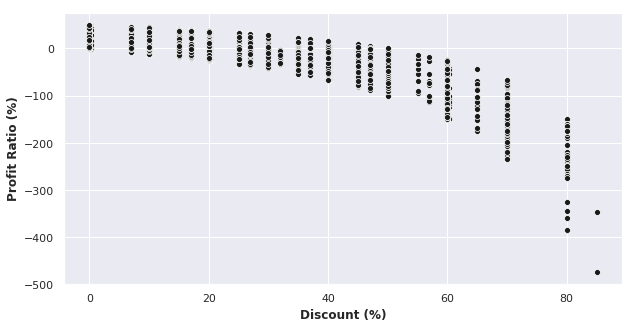

In [0]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Discount_Percent', y = 'Profit_Ratio', 
                data = retail_df, color = 'k')
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')

**OBSERVATIONS**: We can see a clear negative trend between Profit_Ratio and Discount. There is a sharp dropout for Discount > 0.6.

### Compare linear and polynomial (deg > 1) regressions

Text(0, 0.5, 'Profit Ratio (%)')

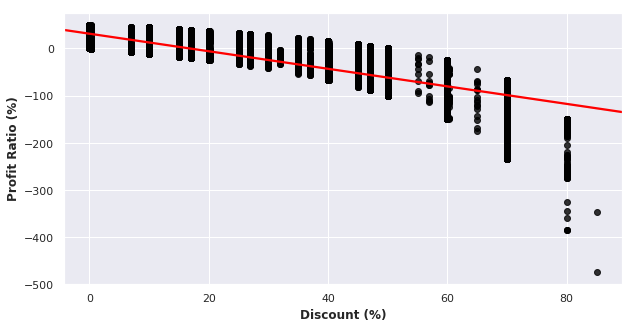

In [0]:
# Linear regression
plt.figure(figsize=(10,5))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = retail_df, 
            scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')

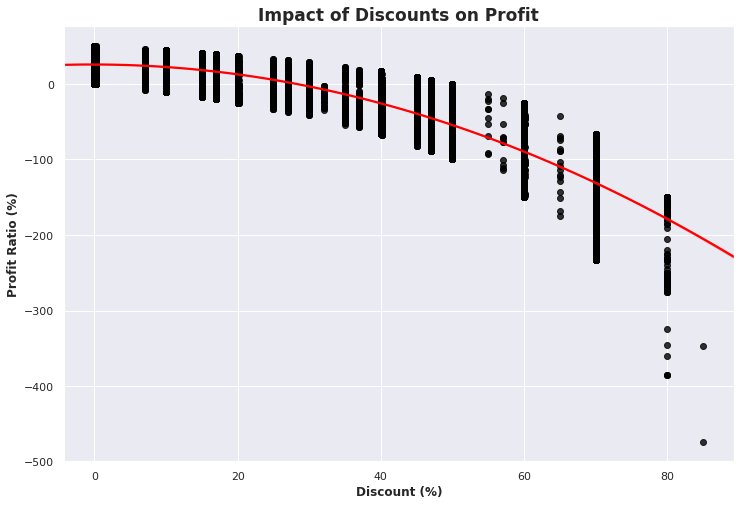

In [0]:
# Polynomial regression (order = 2)
plt.figure(figsize=(12,8))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = retail_df, order= 2,
            scatter_kws={'color':'black'}, line_kws={'color': 'red'})
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')
plt.title('Impact of Discounts on Profit', weight = 'bold', fontsize=17)
plt.savefig(save_path + 'profit_general.png')

Text(0, 0.5, 'Profit Ratio (%)')

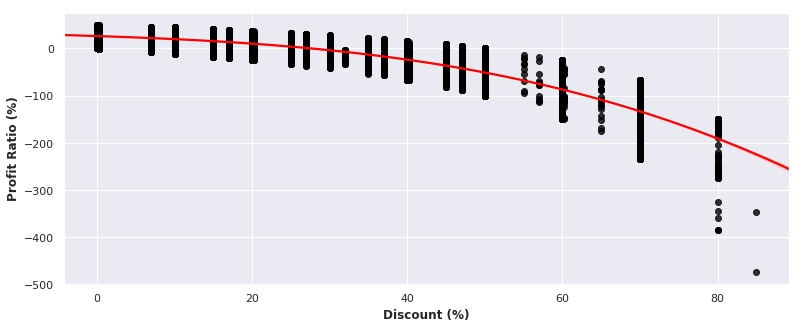

In [0]:
# Polynomial regression (order = 3)
plt.figure(figsize=(13, 5))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = retail_df, order = 3,
            scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')

**OBSERVATIONS**: Comparing the linear regression with the polynomial model of order = 2, the breakeven point (where profit_ratio = 0) is noticeable at different places. The former occurs at around 20% discount while the latter happens at a higher rate of around 30%.

Visually, there does not appear much difference between models of order 2 and order 3. Will need to perform modeling later on to see the differences.

## Time series for profits

In [0]:
retail_ts_df = retail_df.set_index('Order Date')
retail_ts_df['Profit'] = retail_ts_df['Profit']/1000 # Scale dollar amount 
retail_ts_df.head()

,Year Of Order,Month Of Order,Day Of Order,Market,Product ID,Category,Product Name,Segment,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Ratio,Discount_Percent
Order Date,,,,,,,,,,,,,,,
2016-07-31,2016,7,31,US,TEC-AC-10003033,Technology,Plantronics CS510 - Over-the-Head monaural Wir...,Consumer,Accessories,2309.650,7,0.0,0.762184,33.000000,0.0
2017-02-05,2017,2,5,APAC,FUR-CH-10003950,Furniture,"Novimex Executive Leather Armchair, Black",Corporate,Chairs,3709.395,9,0.1,-0.288765,-7.784693,10.0
2017-10-17,2017,10,17,APAC,TEC-PH-10004664,Technology,"Nokia Smart Phone, with Caller ID",Consumer,Phones,5175.171,9,0.1,0.919971,17.776630,10.0
2017-01-28,2017,1,28,EU,TEC-PH-10004583,Technology,"Motorola Smart Phone, Cordless",Home Office,Phones,2892.510,5,0.1,-0.096540,-3.337586,10.0
2017-11-05,2017,11,5,Africa,TEC-SHA-10000501,Technology,"Sharp Wireless Fax, High-Speed",Consumer,Copiers,2832.960,8,0.0,0.311520,10.996272,0.0


### Profit Time Series for all items

In [0]:
# Resample profits by quarterly
profit_ts      = retail_ts_df[retail_ts_df['Profit'] >=0]
profit_quarter = profit_ts['Profit'].resample('Q')

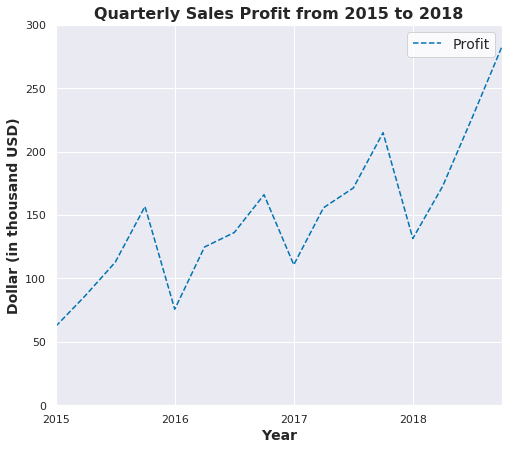

In [0]:
# Plot Profit time series
palette = sns.color_palette('colorblind')
sns.set_palette(palette)

plt.figure(figsize=(8,7))
profit_quarter.sum().plot(style='--')
plt.ylim(0,300)
plt.title('Quarterly Sales Profit from 2015 to 2018', fontweight = 'bold', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Dollar (in thousand USD)', fontsize = 14)
plt.legend(['Profit'], facecolor = 'w', fontsize = 14)
plt.savefig(save_path + 'profit_quarterly.png')

**OBSERVATIONS**: There is an overall increase in profits over the last few years.

### Profit-Discount relationship for each year

Profit-Discount relationship in different years

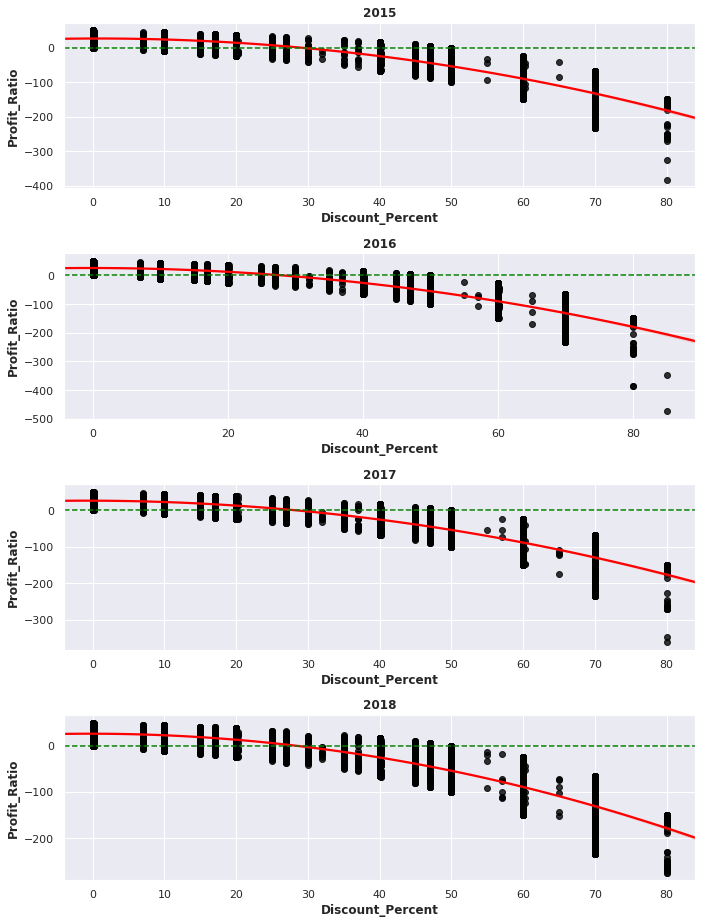

In [0]:
fig, axs = plt.subplots(nrows = 4, ncols = 1)
years = np.sort(retail_df['Year Of Order'].unique())
fig.set_size_inches(10,13)

for ax, year in zip(axs, years):
  df = retail_df[retail_df['Year Of Order'] == year]
  sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = df, order = 2, ax = ax,
              scatter_kws={'color':'black'}, line_kws = {'color':'red'})
  ax.axhline(y=0, color='green', linestyle='--', linewidth=1.5);
  ax.set_title(str(year), weight = 'bold')
fig.tight_layout()
fig.savefig(save_path + 'profit_discount_group.png')

### Plot for one of the years for figure output

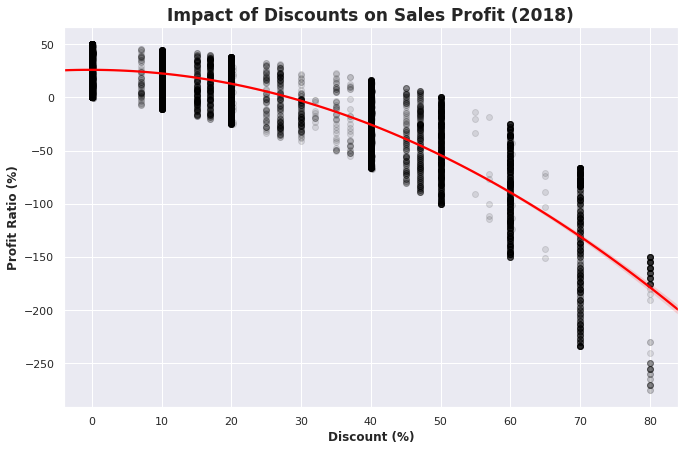

In [0]:
df = retail_df[retail_df['Year Of Order'] == 2018]
plt.figure(figsize=(11,7))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = df, order = 2,
              scatter_kws={'color':'black', 'alpha': 0.1}, line_kws = {'color':'red'})
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')
plt.title('Impact of Discounts on Sales Profit (2018)', weight = 'bold', fontsize=17)
plt.savefig(save_path + 'profit_discount_2018.png')

## Time series on loss


In [0]:
loss_ts_df = retail_ts_df[retail_ts_df['Profit'] < 0]
loss_quarter = loss_ts_df['Profit'].resample('Q')

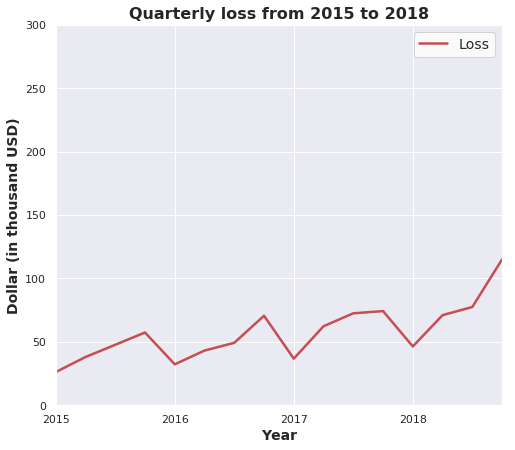

In [0]:
palette = sns.color_palette('colorblind')
sns.set_palette(palette)

plt.figure(figsize=(8,7))
loss_quarter.sum().abs().plot(color = 'r', linewidth=2.5)
plt.ylim(0,300)
plt.title('Quarterly loss from 2015 to 2018', fontweight = 'bold', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Dollar (in thousand USD)', fontsize = 14)
plt.legend(['Loss'], facecolor = 'w', fontsize = 14)
plt.savefig(save_path + 'loss_quarterly.png')

### Profit Time Series for individual categories

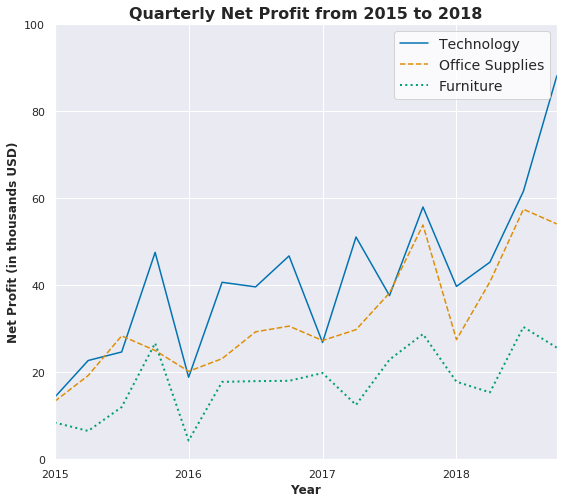

In [0]:
tech_profit_ts      = retail_ts_df[retail_ts_df['Category'] == 'Technology']
office_profit_ts    = retail_ts_df[retail_ts_df['Category'] == 'Office Supplies']
furniture_profit_ts = retail_ts_df[retail_ts_df['Category'] == 'Furniture']

# Resample profit time series by quarters
furniture_profit_quarter_ts = furniture_profit_ts['Profit'].resample('Q')
office_profit_quarter_ts    = office_profit_ts['Profit'].resample('Q')
tech_profit_quarter_ts      = tech_profit_ts['Profit'].resample('Q')

palette = sns.color_palette('colorblind')
sns.set_palette(palette)
plt.figure(figsize=(9,8))
tech_profit_quarter_ts.sum().plot()
office_profit_quarter_ts.sum().plot(style = '--')
furniture_profit_quarter_ts.sum().plot(style=':', linewidth=2)

plt.ylim(0, 100)
plt.xlabel('Year')
plt.ylabel('Net Profit (in thousands USD)')
plt.legend(['Technology', 'Office Supplies', 'Furniture'], facecolor = 'w', fontsize = 14)
plt.title('Quarterly Net Profit from 2015 to 2018', weight = 'bold', fontsize = 16)
plt.savefig(save_path + 'profit_quarterly_cat.png')

### Profit and Loss Comparison plot

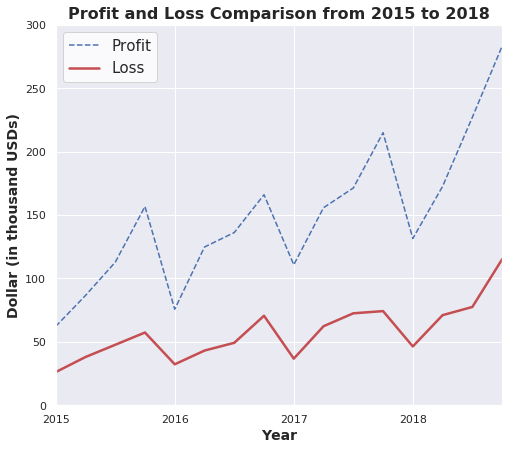

In [0]:
plt.figure(figsize=(8,7))

profit_quarter.sum().plot(style='--', color = 'b')
loss_quarter.sum().abs().plot(color = 'r', linewidth = 2.5)
plt.legend(['Profit', 'Loss'], facecolor='w', fontsize=15)
plt.ylim(0,300)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Dollar (in thousand USDs)', fontsize=14)
plt.title('Profit and Loss Comparison from 2015 to 2018', weight = 'bold', fontsize = 16)
plt.savefig(save_path + 'profit_loss_quarterly.png')

**OBSERVATIONS**: Profit is larger than Loss, as expected from the above findings.

## Time series on sales 

In [0]:
# Sum data by quarterly
sales_quarter = retail_ts_df['Sales'].resample('Q')

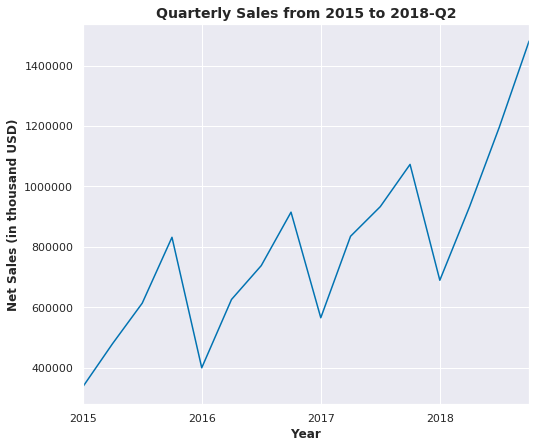

In [0]:
palette = sns.color_palette('colorblind')
sns.set_palette(palette)

sales_quarter.sum().plot(figsize=(8, 7))
plt.title('Quarterly Sales from 2015 to 2018-Q2', fontweight = 'bold', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Net Sales (in thousand USD)')
plt.savefig(save_path + 'sales_quarterly.png')

**OBSERVATIONS**: It seems that sales typically increase during the latter half of the year (between Summer and Fall).

### Loss Time Series by Categories

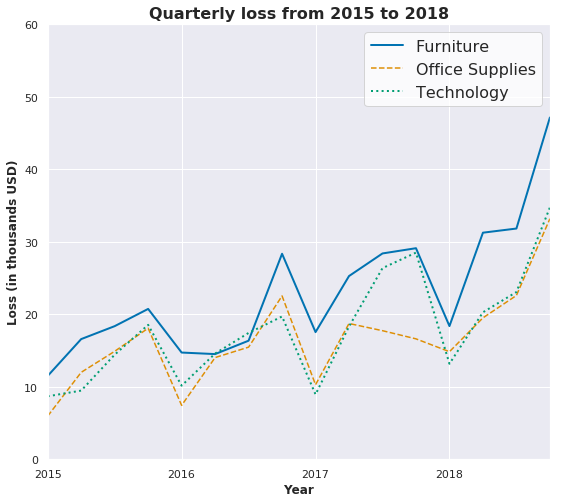

In [0]:
# Split the dataframe by product categories
tech_loss_ts      = loss_ts_df[loss_ts_df['Category'] == 'Technology']
office_loss_ts    = loss_ts_df[loss_ts_df['Category'] == 'Office Supplies']
furniture_loss_ts = loss_ts_df[loss_ts_df['Category'] == 'Furniture']

# Resample profit by quarters
furniture_loss_quarter_ts = furniture_loss_ts['Profit'].resample('Q')
office_loss_quarter_ts    = office_loss_ts['Profit'].resample('Q')
tech_loss_quarter_ts      = tech_loss_ts['Profit'].resample('Q')

# Plotting stuff
palette = sns.color_palette('colorblind')
sns.set_palette(palette)
plt.figure(figsize=(9,8))

furniture_loss_quarter_ts.sum().abs().plot(linewidth=2)
office_loss_quarter_ts.sum().abs().plot(style = '--')
tech_loss_quarter_ts.sum().abs().plot(style=':', linewidth=2)

plt.ylim(0,60)
plt.xlabel('Year')
plt.ylabel('Loss (in thousands USD)')
plt.legend(['Furniture', 'Office Supplies', 'Technology'], facecolor = 'w', fontsize = 16)
plt.title('Quarterly loss from 2015 to 2018', weight = 'bold', fontsize = 16)
plt.savefig(save_path + 'loss_quarterly_cat.png')

**OBSERVATIONS**: The overall pattern is that products in the `Technology` category have the most leads in retail profits, follow closely by `Office Supplies` and then `Furniture`. In the latest quarter (i.e, 2018 Q2), the gap between these three categories is seen largest compared to previous years. Let us focus the remaining analysis on 2018.

## Analysis on 2018 Data

In [0]:
retail_2018_df = retail_ts_df[retail_ts_df['Year Of Order'] == 2018]

### Bin discounts by type

Define the following discounts by type:
* Low (0 to 30%)
* Medium (31 to 60%)
* High (>61%)

In [0]:
bin_set    = [-1, 30, 60, 100]
bin_labels = ['low', 'medium', 'high'] 

In [0]:
retail_2018_df['Discount_type'] = pd.cut(retail_2018_df['Discount_Percent'], bins = bin_set, labels = bin_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Look at net profit distribution across different markets

In [0]:
market_2018 = retail_2018_df.groupby(['Market','Category'])['Profit'].sum()

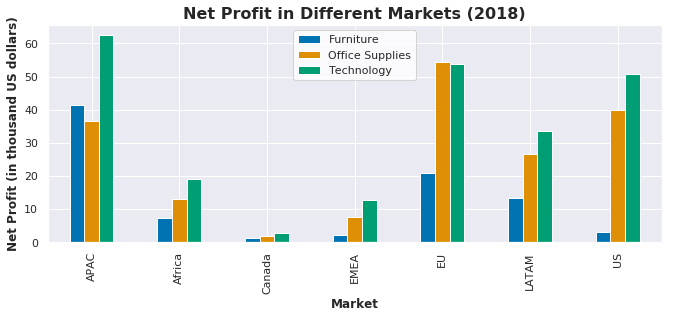

In [0]:
market_2018.unstack().plot(kind = 'bar', figsize = (11, 4))
palette = sns.color_palette('Paired')
sns.set_palette(palette)

plt.ylabel('Net Profit (in thousand US dollars)')
plt.legend(facecolor = 'w')
plt.title('Net Profit in Different Markets (2018)', weight = 'bold', fontsize = 16)
plt.savefig(save_path + 'net_profit_market_cat.png')

**OBSERVATIONS**: In most markets, products under the `Furniture` category have the lowest performance (except for APAC and EMEA).

### Look at quantity of sales by (sub)-categories

In [0]:
retail_2018_df.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending = False)

Sub-Category
Binders        7410
Storage        5729
Art            5634
Paper          4107
Chairs         4034
Phones         3936
Accessories    3720
Furnishings    3695
Labels         3295
Supplies       3038
Bookcases      2910
Fasteners      2879
Envelopes      2730
Copiers        2642
Appliances     2102
Machines       1734
Tables         1027
Name: Quantity, dtype: int64

**OBSERVATIONS**: Top 5 products with largest sales quantity are:
1. Binders
2. Art
3. Storage
4. Paper
5. Phones

Bottom 5 include:
1. Tables
2. Machines
3. Appliances
4. Envelopes
5. Bookcases

In [0]:
retail_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17531 entries, 2018-10-14 to 2018-06-20
Data columns (total 16 columns):
Year Of Order       17531 non-null int64
Month Of Order      17531 non-null int64
Day Of Order        17531 non-null int64
Market              17531 non-null object
Product ID          17531 non-null object
Category            17531 non-null object
Product Name        17531 non-null object
Segment             17531 non-null object
Sub-Category        17531 non-null object
Sales               17531 non-null float64
Quantity            17531 non-null int64
Discount            17531 non-null float64
Profit              17531 non-null float64
Profit_Ratio        17531 non-null float64
Discount_Percent    17531 non-null float64
Discount_type       17531 non-null category
dtypes: category(1), float64(5), int64(4), object(6)
memory usage: 2.2+ MB


In [0]:
pos_pratio_2018_df = retail_2018_df[retail_2018_df['Profit_Ratio'] >= 0]
neg_pratio_2018_df = retail_2018_df[retail_2018_df['Profit_Ratio'] < 0]

## Look at entries with positive profit ratios

In [0]:
pos_pratio_2018_df.groupby(['Category'])['Profit'].sum().sort_values(ascending = False)

Category
Technology         326.219265
Office Supplies    270.084477
Furniture          217.950699
Name: Profit, dtype: float64

**OBSERVATIONS**: Top five sub-categories of products that generated the majority of positive profits are:
 1. Copier
 2. Phones
 3. Bookcases
 4. Chairs
 5. Appliances
 
 
 This is similar in ranking when all data is considered. One notable difference is that `Phones` appeared in the top 5 in this ranking.

In [0]:
pos_pratio_2018_df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending = False)

Sub-Category
Copiers        475967.87948
Phones         464271.40150
Bookcases      416155.01000
Chairs         362798.52020
Storage        306458.53810
Appliances     301857.07150
Accessories    221376.44250
Machines       204481.23380
Binders        138111.45420
Tables         122341.71700
Art            113327.97560
Furnishings    105082.68640
Paper           72720.84620
Supplies        67594.42880
Envelopes       45240.70590
Fasteners       23484.89710
Labels          22399.25550
Name: Sales, dtype: float64

In [0]:
pos_pratio_2018_df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending = False)

Sub-Category
Copiers        125.683782
Phones         100.372710
Bookcases       96.021580
Chairs          73.600612
Appliances      72.116700
Storage         64.511676
Accessories     55.190718
Machines        44.972055
Binders         43.049304
Art             27.714264
Furnishings     24.591656
Paper           23.778170
Tables          23.736851
Supplies        14.060898
Envelopes       12.246531
Labels           6.500749
Fasteners        6.106184
Name: Profit, dtype: float64

In [0]:
pos_pratio_2018_df.groupby(['Market','Category'], group_keys=False)['Profit'].sum()

Market  Category       
APAC    Furniture          72.934532
        Office Supplies    56.215667
        Technology         84.745574
Africa  Furniture          16.869330
        Office Supplies    21.524064
        Technology         27.725010
Canada  Furniture           1.217970
        Office Supplies     1.974210
        Technology          2.800830
EMEA    Furniture          17.226690
        Office Supplies    21.417300
        Technology         23.951970
EU      Furniture          44.577270
        Office Supplies    71.734920
        Technology         74.574089
LATAM   Furniture          42.814516
        Office Supplies    35.658280
        Technology         48.913298
US      Furniture          22.310391
        Office Supplies    61.560036
        Technology         63.508495
Name: Profit, dtype: float64

**OBSERVATIONS**: For most of the markets, products under `Technology` generated the most profits.

## Look at negative profits (i.e., loss)

In [0]:
neg_pratio_2018_df.groupby(['Category'])['Profit'].sum().sort_values()

Category
Furniture         -128.638636
Technology         -91.291414
Office Supplies    -90.158420
Name: Profit, dtype: float64

**OBSERVATIONS**: Altogether, products under `Furniture` generated the most loss.

### Market distribution of loss

In [0]:
neg_pratio_2018_df.groupby(['Market'])['Profit'].sum().sort_values()

Market
APAC     -73.441275
EU       -61.941921
LATAM    -54.051295
US       -53.871409
EMEA     -39.995637
Africa   -26.786934
Name: Profit, dtype: float64

In [0]:
loss_market = neg_pratio_2018_df.groupby(['Market','Category'])['Profit'].sum().abs()

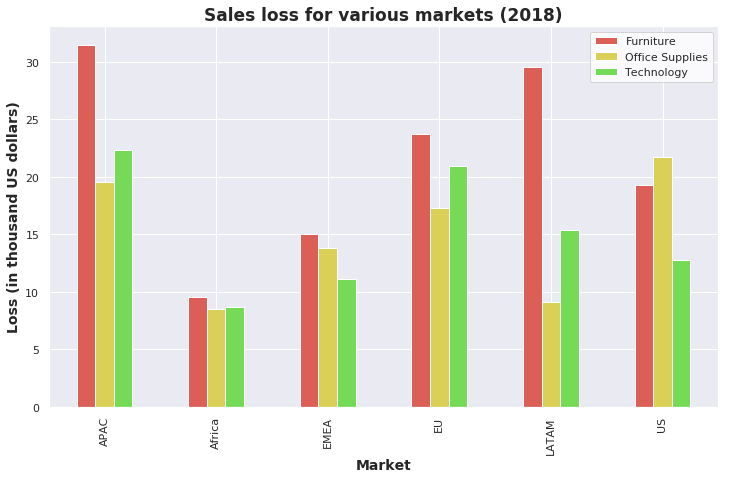

In [0]:
palette = sns.color_palette('hls', 7)
sns.set_palette(palette)
loss_market.unstack().plot(kind = 'bar', figsize = (12, 7))
plt.xlabel('Market', fontsize = 14)
plt.ylabel('Loss (in thousand US dollars)', fontsize = 14)
plt.legend(facecolor = 'w')
plt.title('Sales loss for various markets (2018)', weight = 'bold', fontsize = 17)
plt.savefig(save_path + 'loss_market_cat.png')

**OBSERVATIONS**: In most markets, there are major sales loss from `Furniture` sales except Africa and EMEA. In certain markets, the loss generated by selling `Technology` products is also quite comparable as well (e.g., EU).

In [0]:
# Losses by subcategories
neg_pratio_2018_df.groupby(['Sub-Category'])['Profit'].sum().sort_values()

Sub-Category
Tables        -54.282760
Bookcases     -32.802529
Chairs        -32.352341
Phones        -29.715069
Machines      -26.344310
Storage       -25.494724
Copiers       -21.635246
Binders       -20.692814
Appliances    -19.076200
Accessories   -13.596789
Furnishings    -9.201007
Art            -7.630504
Supplies       -6.695489
Envelopes      -3.886440
Paper          -2.802339
Fasteners      -2.433877
Labels         -1.446033
Name: Profit, dtype: float64

In [0]:
# Losses by subcategories for each category
neg_pratio_2018_df.groupby(['Category','Sub-Category'])['Profit'].sum()

Category         Sub-Category
Furniture        Bookcases      -32.802529
                 Chairs         -32.352341
                 Furnishings     -9.201007
                 Tables         -54.282760
Office Supplies  Appliances     -19.076200
                 Art             -7.630504
                 Binders        -20.692814
                 Envelopes       -3.886440
                 Fasteners       -2.433877
                 Labels          -1.446033
                 Paper           -2.802339
                 Storage        -25.494724
                 Supplies        -6.695489
Technology       Accessories    -13.596789
                 Copiers        -21.635246
                 Machines       -26.344310
                 Phones         -29.715069
Name: Profit, dtype: float64

The sub-category that generated the most loss are:

1. Tables
2. Bookcases
3. Phones
4. Chairs
5. Machines

If one wants to take out one of the products because it was making a loss, make sure to take out reltaed products such as accessories.

## Category: Office Supples

In [0]:
office_df = retail_2018_df[retail_2018_df['Category'] == 'Office Supplies']

In [0]:
office_df['Sub-Category'].unique()

array(['Binders', 'Appliances', 'Storage', 'Supplies', 'Art', 'Paper',
       'Fasteners', 'Envelopes', 'Labels'], dtype=object)

Look at distribution of discount types

In [0]:
office_market_discount_type = office_df.groupby(['Market'])['Discount_type'].value_counts()

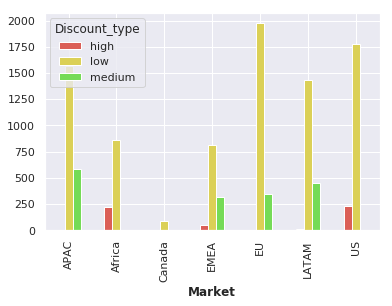

In [0]:
office_market_discount_type.unstack().plot(kind='bar')

## Category: Furniture

In [0]:
furniture_2018_df = retail_2018_df[retail_2018_df['Category'] == 'Furniture']

In [0]:
furniture_loss_df = furniture_2018_df[furniture_2018_df['Profit'] < 0]

In [0]:
furniture_loss_df.groupby(['Market', 'Sub-Category'])['Profit'].sum()

Market  Sub-Category
APAC    Bookcases       -7.281106
        Chairs          -8.362819
        Furnishings     -0.888993
        Tables         -14.984158
Africa  Bookcases       -3.496095
        Chairs          -3.401802
        Furnishings     -0.506244
        Tables          -2.168337
EMEA    Bookcases       -4.838766
        Chairs          -3.893115
        Furnishings     -1.165899
        Tables          -5.101674
EU      Bookcases       -7.450356
        Chairs          -6.376653
        Furnishings     -1.804170
        Tables          -8.101285
LATAM   Bookcases       -6.747292
        Chairs          -7.001548
        Furnishings     -2.812868
        Tables         -12.963456
US      Bookcases       -2.988914
        Chairs          -3.316404
        Furnishings     -2.022833
        Tables         -10.963849
Name: Profit, dtype: float64

In [0]:
#furniture_2018_df.groupby(['Product Name'])['Profit'].sum()

## Seasonality on discount?

In [0]:
furniture_2018_discount_season = furniture_2018_df['Discount_type'].resample('Q', how = lambda x: x.value_counts())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [0]:
furniture_2018_discount_season 

Order Date        
2018-03-31  low       409
            medium     80
            high       14
2018-06-30  low       600
            medium    147
            high       32
2018-09-30  low       704
            medium    173
            high       20
2018-12-31  low       920
            medium    220
            high       28
Name: Discount_type, dtype: int64

**OBSERVATIONS**: It seems that in most cases, low discount rates are applied to furnitures.

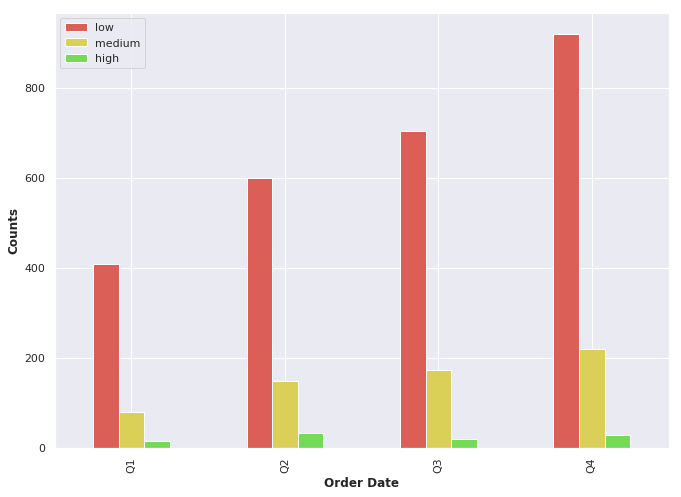

In [0]:
ax = furniture_2018_discount_season.unstack().plot(kind = 'bar', figsize = (11, 8))
ax.set_xticklabels(['Q1', 'Q2','Q3','Q4'])
plt.ylabel('Counts')
plt.savefig(save_path + 'discount_season.png')

**OBSERVATIONS**: We can see low discounts are given out much more frequently the latter half of the year.

In [0]:
furniture_2018_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Of Order,3347.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.00000
Month Of Order,3347.0,7.582014,3.316095,1.000000,5.000000,8.000000,11.000000,12.00000
Day Of Order,3347.0,16.068419,8.696231,1.000000,9.000000,16.000000,24.000000,31.00000
Sales,3347.0,411.728620,551.175965,1.892000,89.052000,220.560000,505.890000,5729.34600
Quantity,3347.0,3.485509,2.312939,1.000000,2.000000,3.000000,5.000000,14.00000
Discount,3347.0,0.166815,0.201748,0.000000,0.000000,0.100000,0.270000,0.80000
Profit,3347.0,0.026684,0.211674,-2.750280,-0.014154,0.015090,0.064785,2.31651
Profit_Ratio,3347.0,0.842303,43.841378,-240.304183,-8.755973,11.987382,28.718220,50.00000
Discount_Percent,3347.0,16.681506,20.174763,0.000000,0.000000,10.000000,27.000000,80.00000


## A Hypothetical Scenario

If we suppose that the company caps the discounts applied to about 30% (for furnitures only) and assuming that the demand remains unchanged, how much many would the company would have made?

In [0]:
furniture_2018_df = retail_2018_df[retail_2018_df['Category'] == 'Furniture']

In [0]:
# Remove the time series index that was applied earlier
furniture_2018_df = furniture_2018_df.reset_index()

In [0]:
def new_sales(df):
  '''
  Calculates new sales figure assuming that the discount
  is capped at 30%.

  i.e., 
       new sale = (old sale/ (1-old_discount)) * (1 - 30%)
  '''
  sale = df['Sales']
  if df['Discount'] > 0.30:
    sale = (df['Sales']/ (1-df['Discount'])) *(1 - 0.30)
  return sale

In [0]:
# Calculates new sales column
furniture_2018_df['New_Sales'] = furniture_2018_df.apply(new_sales, axis = 1)

With the new sales figure calculated, the new profit is simply...

$$ \text{New profit} = \text{Old profit} + (\text{New sales} - \text{Old sales})$$


In [0]:
furniture_2018_df['New_Profit'] = furniture_2018_df['Profit'] + (furniture_2018_df['New_Sales'] - furniture_2018_df['Sales'])

In [0]:
furniture_2018_df.groupby(['Market', 'Sub-Category'])['New_Profit'].sum()

Market  Sub-Category
APAC    Bookcases        4150.465582
        Chairs           1355.772720
        Furnishings       164.223353
        Tables          11491.972001
Africa  Bookcases        3280.192905
        Chairs           3119.028798
        Furnishings       476.378556
        Tables           1785.712593
Canada  Bookcases           0.754170
        Chairs              0.434280
        Furnishings         0.029520
EMEA    Bookcases        4267.813794
        Chairs           3915.205155
        Furnishings      1101.721611
        Tables           4222.469676
EU      Bookcases        4942.424562
        Chairs           4328.442165
        Furnishings       758.433126
        Tables           4888.091452
LATAM   Bookcases        3528.469664
        Chairs           3330.026604
        Furnishings      1664.841320
        Tables           8557.155764
US      Bookcases        1729.443174
        Chairs              7.643549
        Furnishings      1533.823163
        Tables   

In [0]:
furniture_2018_df.groupby(['Market'])['New_Profit'].sum()

Market
APAC      17162.433656
Africa     8661.312852
Canada        1.217970
EMEA      13507.210236
EU        14917.391305
LATAM     17080.493352
US         8157.260691
Name: New_Profit, dtype: float64

## Examine specific SKUs in furniture that are underperforming 

In [0]:
temp_df = furniture_2018_df[furniture_2018_df['Profit'] < 0]
temp_df.groupby(['Market'])['Profit'].sum()

Market
APAC     -31.517076
Africa    -9.572478
EMEA     -14.999454
EU       -23.732465
LATAM    -29.525164
US       -19.292000
Name: Profit, dtype: float64

In [0]:
agg = temp_df.groupby(['Market','Product Name']).agg({'Profit':sum})
g = agg['Profit'].groupby(level=0, group_keys=False)

In [0]:
g.nsmallest(3)

Market  Product Name                                                     
APAC    Hon Conference Table, Rectangular                                   -2.380350
        Bevis Wood Table, with Bottom Storage                               -1.814706
        Lesro Training Table, Adjustable Height                             -1.195239
Africa  Bevis Training Table, Fully Assembled                               -1.150830
        Harbour Creations Rocking Chair, Set of Two                         -1.087212
        SAFCO Executive Leather Armchair, Red                               -0.636822
EMEA    Barricks Conference Table, Rectangular                              -2.750280
        Bevis Round Table, Adjustable Height                                -1.779768
        Harbour Creations Executive Leather Armchair, Black                 -0.880956
EU      Sauder Classic Bookcase, Metal                                      -1.981395
        Barricks Conference Table, Adjustable Height              

In [0]:
#furniture_2018_df.groupby(['Market','Sub-Category', 'Discount_type'])['Quantity'].sum()

Market  Sub-Category  Discount_type
APAC    Bookcases     low               642
                      medium            210
        Chairs        low              1199
                      medium             87
        Furnishings   low               813
                      medium             41
        Tables        low               108
                      medium             76
                      high               17
Africa  Bookcases     low               104
                      high               52
        Chairs        low               113
                      high               44
        Furnishings   low               156
                      high               23
        Tables        low                31
                      high               12
Canada  Bookcases     low                18
        Chairs        low                14
        Furnishings   low                 4
EMEA    Bookcases     low               118
                      medium            

## Sub-category: Tables

In [0]:
tables_2018_df = retail_2018_df[retail_2018_df['Sub-Category'] == 'Tables']

Text(0, 0.5, 'Profit Ratio (%)')

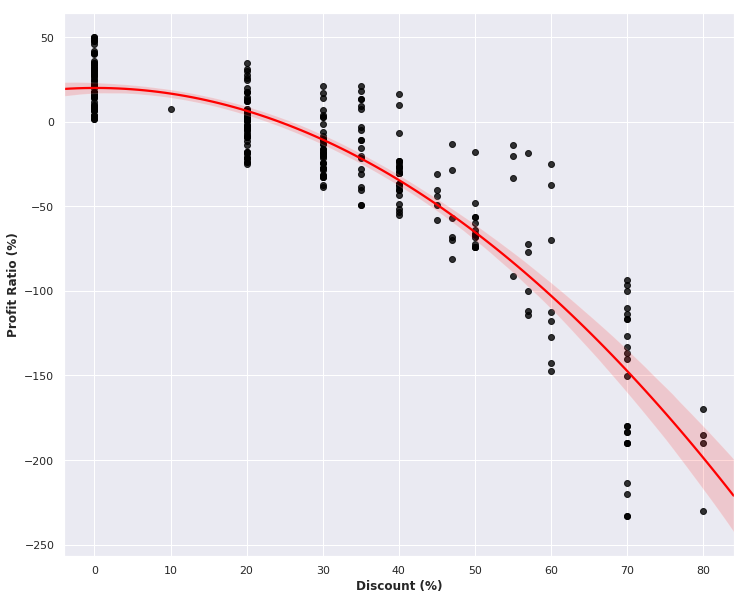

In [0]:
plt.figure(figsize=(12, 10))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = tables_2018_df, order = 2,
            scatter_kws = {'color':'black'}, line_kws = {'color':'red'})
#plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);
plt.xlabel('Discount (%)')
plt.ylabel('Profit Ratio (%)')

**OBSERVATIONS**: The breakeven point (i.e., profit_ratio = 0) for `Tables` appears to be close to 30%. When more than 20% discount is applied to `Tables`, you generate negative profit. As noted before, there is a steep descent on the profit ratio as discount rate increases. Let us see what happens to the regression line if we truncate the data where the discount is no more than 60%.

## Sub-category: Bookcases

In [0]:
bookcases_2018_df = retail_2018_df[retail_2018_df['Sub-Category'] == 'Bookcases']

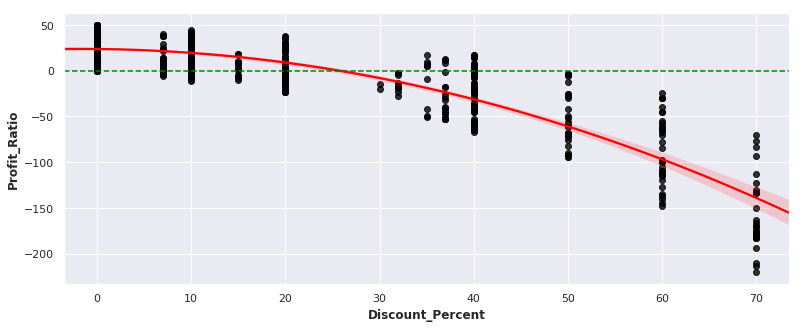

In [0]:
plt.figure(figsize = (13, 5))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = bookcases_2018_df, 
            order = 2, color = 'k', scatter_kws = {'color':'black'}, line_kws = {'color':'red'}
           )
plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);

**OBSERVATIONS**: The breakeven point for `Bookcases` appear to be around 25% discount. 

## Sub-category: Chairs

In [0]:
chairs_2018_df = retail_2018_df[retail_2018_df['Sub-Category'] == 'Chairs']

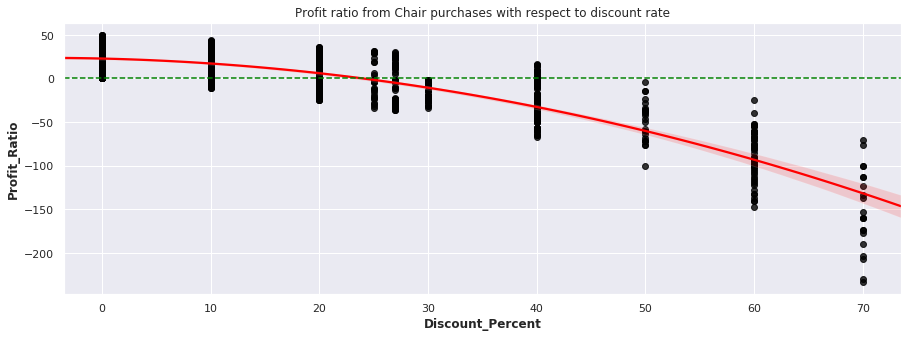

In [0]:
plt.figure(figsize=(15, 5))
plt.title('Profit ratio from Chair purchases with respect to discount rate')
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = chairs_2018_df, 
            color = 'k', order = 2,
            scatter_kws = {'color':'black'}, line_kws = {'color':'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);

**OBSERVATIONS**: The breakeven point for `Bookcases` appear to be around 25% discount. 

## Category: Technology

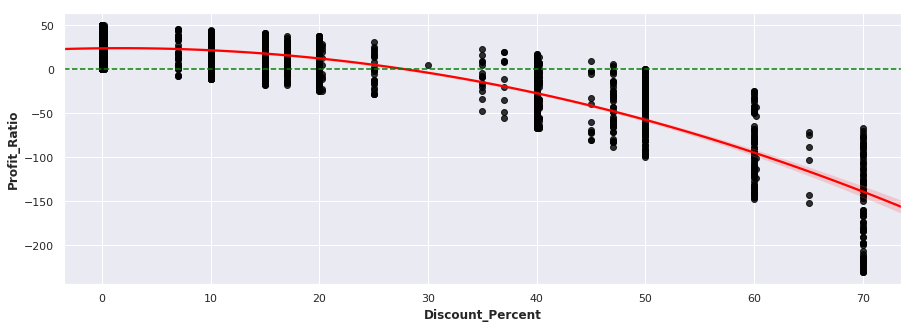

In [0]:
tech_df = retail_2018_df[retail_2018_df['Category'] == 'Technology']
plt.figure(figsize=(15, 5))
sns.regplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = tech_df, order = 2, 
            scatter_kws={'color':'black'}, line_kws = {'color':'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);

In [0]:
tech_df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending = False)

Sub-Category
Phones         552006.38010
Copiers        550384.89376
Machines       260279.23590
Accessories    253488.16360
Name: Sales, dtype: float64

### Sub-category: Phones

In [0]:
phones_df = retail_2018_df[retail_2018_df['Sub-Category'] == 'Phones']

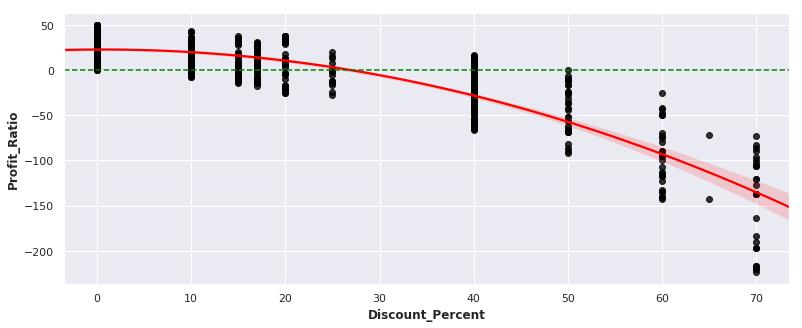

In [0]:
plt.figure(figsize=(13,5))
sns.regplot(x = 'Discount_Percent', y ='Profit_Ratio', data = phones_df,
            order = 2, scatter_kws={'color':'black'}, line_kws = {'color':'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);

# Modeling

In [0]:
# Import sklearn library stuff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import r2_score, mean_squared_error

from sklearn.linear_model    import LinearRegression, Ridge, Lasso

import operator

## Prototyping

In [0]:
market   = 'APAC'
subcategory = 'Tables'

df = retail_2018_df[(retail_2018_df['Market'] == market) & (retail_2018_df['Sub-Category'] == subcategory)]

In [0]:
# Assign variables
X = df['Discount_Percent'].values
y = df['Profit_Ratio'].values

In [0]:
# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42
                                                   )

Use `numpy.polyfit`

In [0]:
deg             = 2
quad_model, C_p = np.polyfit(X_train, y_train, deg, cov = True)
quad_func       = np.poly1d(quad_model)

In [0]:
y_pred = quad_func(X_test)

Evaluate the model

In [0]:
# Compute r2 score
r2 = r2_score(y_test, y_pred)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)

print(f'r2: {r2: .2f}')
print(f'MSE: {mse: .2f}')

r2:  0.77
MSE:  525.75


In [0]:
# Sort the X and y values
y_pred_all    = quad_func(X)
sort_axis     = operator.itemgetter(0)
sorted_zip    = sorted(zip(X,y_pred_all), key=sort_axis)
X, y_pred_all = zip(*sorted_zip)

In [0]:
# For plotting
X_plot = np.linspace(0, 80, 80)
y_plot = quad_func(X_plot)

### Confidence Interval Calculation

If you have enough data points, you can get with the parameter cov=True an estimated covariance matrix from polyfit(). Recall that you can write a polynomial 
$$p_{0}t^n + p_{1}t^{n-1} + ... + p_{n}$$ 
as a matrix product 
$$\Pi\cdot p$$ 
with 
$$\Pi=[t^n, t^{n-1}, ..., 1].$$ 
The variable $t$ can be either a single value or a column vector. Since this a linear equation, with the covariance matrix $C_p$ of $p$, the covariance matrix of the values is 
$$Cov = \Pi C_p \Pi^T.$$

where $C_p$ was obtained from `np.polyfit(cov = True)` that already done above. 

With the covariance matrix obtained, the standard deviation of $y$ is simply the square root of the diagonal in the covariance matrix. (Did I do this right? lol)

In [0]:
# Confidence Interval stuff (prediction bands)
X_int = np.linspace(0., 80, 80)

p = quad_model

# Matrix with rows 1, t, t**2, ...:
TT = np.vstack([X_int**(deg-i) for i in range(deg+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(C_p, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal

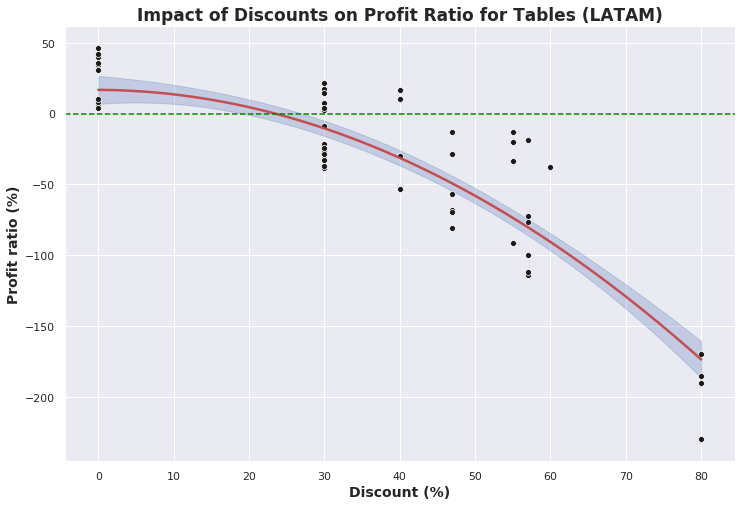

In [0]:
plt.figure(figsize=(12, 8))
plt.fill_between(X_int, yi+sig_yi, yi-sig_yi, alpha=.25, color = 'b')
sns.scatterplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = df,  color = 'k')
sns.lineplot(X_plot, y_plot,  color = 'r', linewidth = 2.5)
plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);
plt.xlabel('Discount (%)', fontsize = 14)
plt.ylabel('Profit ratio (%)', fontsize = 14)
plt.title('Impact of Discounts on Profit Ratio for Tables (LATAM)', weight = 'bold', fontsize = 17)
plt.savefig(save_path + 'profit_discount_table_latam_CI.png')

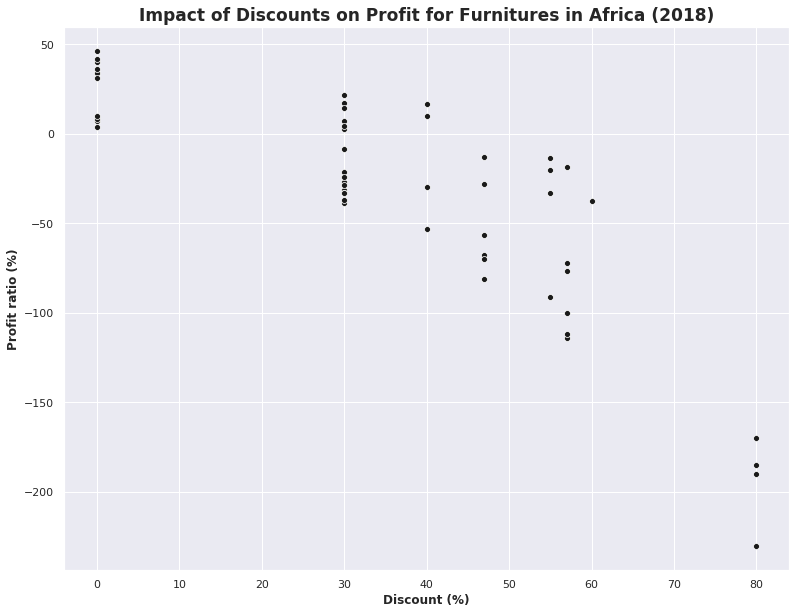

In [0]:
'''
plt.figure(figsize=(13, 10))
#plt.fill_between(X_int, yi+sig_yi, yi-sig_yi, alpha=.5)
sns.scatterplot(x = 'Discount_Percent', y = 'Profit_Ratio', data = df,  color = 'k')
#sns.lineplot(X, y_pred_all,  color = 'r', linewidth = 1.5)
#plt.axhline(y=0, color='green', linestyle='--', linewidth=1.5);
plt.xlabel('Discount (%)')
plt.ylabel('Profit ratio (%)')
plt.title('Impact of Discounts on Profit for Furnitures in Africa (2018)', weight = 'bold', fontsize = 17)

# Here is the label and arrow code of interest

plt.savefig(save_path + 'profit_furniture_africa_2018.png')
'''

Need to find the discount rate that yields profit_ratio = 0 (i.e., breakeven point) by solving the quadratic equation 
$$ y = ax^2 + bx + c  $$

where $y = 0$.

In [0]:
# Find the roots
quad_func.r

array([-24.23584587,  23.46601965])